# Lana Culp - 11.20.2024 - Final Project on Overwatch 2 Hero Statistics

![Overwatch 2 Cover Image](afkgaming_2023-10_4f09ea4c-8b13-4353-a718-ac25dd9991ad_Cover_Image___Overwatch_2_Reveals_Most_Played_Hero_In_History.avif)

## Overview
I will be dissecting Overwatch 2 data based off of the hero statistics as of the year 2023. I will be trying to decipher which hero is the most worth learning to play based off of the win rate percentage. My hypothesis is that the tank role's win percentage is based off of the KDA Ratio, the damage role's win percentage is based off of the damage done, and the support role's win percentage is based off of the healing done.

### References
I utilized statistics derrived from Kaggle (https://www.kaggle.com/datasets/mykhailokachan/overwatch-2-statistics?resource=download) which pulled data from the Heroes section on Overbuff (https://www.overbuff.com/heroes) which is an Overwatch data website that holds player statistics which allows players to look through the data and hopefully use that information to improve their own gameplay. The data was also listed on GitHub (https://github.com/mias1wot/Get-statistics-from-Overbuff). 

In [153]:
import urllib
import requests
import pandas as pd 
import json
import base64
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import numpy as np

# Data in Hand
### Overwatch 2 Hero Statistics 
Currently the hero statistics are organized by hero and skill tier. Each hero is listed with the statistics for each skill tier the hero was played in. The current skill tiers available listed from "easiest" to "hardest" are: bronze, silver, gold, platinum, diamond, master, and grandmaster. There is then an overall tier labeled "all" that describes the hero statistics across all of the skill tiers. With this data being collected from a third party source, it may not be exact information, but it is mostly accurate, and this is my interpretation of the data provided. 

In [154]:
ow_stats = pd.read_csv('ow2_quickplay_heroes_stats__2023-05-06.csv')
#ow_stats.head()

In [155]:
#ow_stats.keys()

### Tidy Data
I chose to drop a majority of columns due to them being extremely hero specific. I wanted to showcase the data that pertained to mostly all of the heros. 

In [156]:
#ow_stats_tidy.keys()

In [157]:
ow_stats_tidy = ow_stats.drop(columns = ['Jagged Blade Accuracy, %', 'Carnage Kills / 10min', 'Wound Uptime, %',
       'Rampage Kills / 10min', 'Focusing Beam Accuracy, %',
       'Focusing Beam Kills / 10min', 'Sticky Bomb Accuracy, %',
       'Sticky Bomb Kills / 10min', 'Duplicate Kills / 10min', 'Players Teleported / 10min', 'Sentry Turret Kills / 10min',
       'Hammer Kills / 10min', 'Turret Kills / 10min',
       'Molten Core Kills / 10min', 'Pummel Accuracy, %',
       'Pummel Kills / 10min', 'Ravenous Vortex Kills / 10min',
       'Annihilation Kills / 10min', 'EMP Kills / 10min', 'Grappling Claw Kills / 10min',
       'Piledriver Kills / 10min', 'Charged Shot Accuracy, %',
       'Charged Crit Accuracy, %', 'Charged Shot Kills / 10min',
       'Disruptor Shot Kills / 10min', 'Overclock Kills / 10min',
       'Average Damage Multiplier', 'Blizzard Kills / 10min', 'Jump Pack Kills / 10min',
       'Primal Rage Kills / 10min', 'Recon Kills / 10min',
       'Assault Kills / 10min', 'Tactical Grenade Kills / 10min',
       'Artillery Kills / 10min', 'Enemies Hacked / 10min',
       'Low Health Teleports / 10min', 'Overhealth / 10min', 'Gravitic Flux Kills / 10min',
       'Rocket Punch Kills / 10min', 'Seismic Slam Kills / 10min',
       'Meteor Strike Kills / 10min', 'Inspire Uptime',
       'Icicle Accuracy, % / 10min', 'Icicle Crit Accuracy, % / 10min',
       'Enemies Frozen / 10min', 'Healing Accuracy', 'Deaths Prevented / 10min',
       'Amp Matrix Assists / 10min', 'Energy Javelin Kills / 10min',
       'Javelin Spin Kills / 10min', 'Terra Surge Kills / 10min', 'Airtime, %',
       'Barrage Kills / 10min', 'Accretion Kills / 10min', 'Pulse Bomb Kills / 10min', 'Chain Hook Kills / 10min',
       'Chain Hook Accuracy, %', 'Whole Hog Kills / 10min',
       'Primary Accuracy, %', 'High Energy Kills / 10min', 'Average Energy, %',
       'Graviton Surge Kills / 10min', 'Death Blossom Kills / 10min', 'Direct Hits',
       'Concussion Mine Kills / 10min', 'Enemies Trapped / 10min',
       'Coach Gun Kills / 10min', 'Dynamite Kills / 10min',
       'Bob Kills / 10min', 'Self Healing / 10min',
       'Low Health Recalls / 10min', 'Pulse Bombs Stuck / 10min', 'Tactical Visor Kills / 10min',
       'Charged Volley Accuracy, %', 'Charged Volley Kills / 10min',
       'Transcendence Healing / 10min', 'Knockbacks / 10min',
       'Sound Barriers / 10min', 'Micro Missile Kills, % / 10min',
       'Call Mech Kills / 10min', 'Self-Destruct Kills / 10min', 'Fire Strike Kills / 10min', 'Earthshatter Kills / 10min',
       'Long Range Kills / 10min', 'Storm Arrow Kills / 10min',
       'Recon Assists / 10min', 'Dragonstrike Kills / 10min',
       'Venom Mine Kills / 10min', 'Helix Rocket Accuracy, %',
       'Helix Rocket Kills / 10min', 'Effects Cleansed / 10min',
       'Kitsune Rush Assists / 10min', 'Secondary Accuracy, %',
       'Biotic Orb Kills / 10min', 'Ally Coalescence Efficiency, %',
       'Enemy Coalescence Efficiency, %', 'Coalescence Kills / 10min',
       'Objective Contest Time / 10min', 'Charge Kills / 10min', 'Crit Accuracy, %', 'Deadeye Kills / 10min',
       'Magnetic Grenade Attaches', 'Magnetic Grenade Kills / 10min',
       'Swift Strike Resets / 10min', 'Damage Reflected / 10min',
       'Ultimates Reflected / 10min', 'Dragonblade Kills / 10min',
       'Kunai Kills / 10min', 'Biotic Grenade Kills / 10min',
       'Enemies Slept / 10min', 'Healing Amplified / 10min',
       'Nano Boost Assists / 10min', 'Blaster Kills / 10min',
       'Damage Amplified / 10min', 'Players Resurrected / 10min', 'Scoped Accuracy, %', 'Final Blows / 10min',
       'Solo Kills / 10min', 'Weapon Accuracy, %'])
ow_stats_tidy.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
0,Ana,All,4.91,7.75,48.73,9.80,3.93,53,2641,7278.0,6.28,Support
1,Ana,Bronze,4.29,6.05,47.17,9.12,3.75,53,2483,6819.0,6.51,Support
2,Ana,Silver,4.33,5.77,47.27,9.19,3.80,53,2505,6829.0,6.52,Support
3,Ana,Gold,4.45,6.01,47.54,9.37,3.86,54,2542,6958.0,6.47,Support
4,Ana,Platinum,4.70,7.06,47.94,9.60,3.91,53,2575,7168.0,6.36,Support


### Sorting Values
I decided to sort the data with the highest win percentage at the top just to see which hero is deemed the most likely to win when played in games, and from the data, it seems that the support hero Brigette has the highest win percentage when played at the Grandmaster skill tier level. 

![Overwatch 2 GrandMaster](grandmaster.png)

In [158]:
ow_stats_tidy.sort_values('Win Rate, %', ascending = False).head(10)

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
199,Brigitte,Grandmaster,4.72,2.10,56.36,13.97,5.36,80,3831,7336.0,7.50,Support
198,Brigitte,Master,4.67,2.02,56.32,13.98,5.39,80,3829,7326.0,7.55,Support
197,Brigitte,Diamond,4.69,2.00,56.22,14.03,5.43,81,3841,7320.0,7.59,Support
250,Symmetra,Silver,3.66,1.57,56.18,18.92,8.33,56,7046,NaN,7.68,Damage
249,Symmetra,Bronze,3.59,1.60,56.13,18.72,8.25,56,6943,NaN,7.66,Damage
192,Brigitte,All,4.80,1.83,56.10,14.04,5.40,81,3873,7349.0,7.62,Support
196,Brigitte,Platinum,4.63,1.79,56.08,13.95,5.45,82,3817,7233.0,7.69,Support
195,Brigitte,Gold,4.46,1.64,56.01,13.69,5.42,83,3737,7076.0,7.82,Support
255,Symmetra,Grandmaster,3.63,1.76,55.99,19.08,8.05,53,7212,NaN,7.65,Damage
194,Brigitte,Silver,4.35,1.66,55.94,13.42,5.36,84,3653,6974.0,7.87,Support


### Dataframes 
I decided to organize the data into separate dataframes initially based on the skill tier I wanted to dissect. I chose to look at the skill tier "All," and I divided the dataframe by role. I wanted to be able to see which hero is best for each role: tank, damage (often referred to as DPS), and support. Each role has different special abilities, so I will choose the ability that is most affective based on role. 

![Overwatch 2 Roles](roles.jpg)

In [159]:
all_df = ow_stats_tidy[ow_stats_tidy['Skill Tier'] == 'All']
all_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
0,Ana,All,4.91,7.75,48.73,9.80,3.93,53,2641,7278.0,6.28,Support
8,Mercy,All,4.46,7.12,49.84,2.37,0.80,49,507,8727.0,6.30,Support
16,Cassidy,All,2.48,4.31,45.39,18.33,6.35,44,7679,NaN,8.45,Damage
24,Genji,All,2.76,5.44,49.04,18.46,5.50,56,7026,NaN,8.27,Damage
32,Kiriko,All,5.38,3.30,49.92,9.48,3.91,66,2760,7988.0,5.66,Support


In [208]:
tank_df = all_df[all_df['Role'] == 'Tank']
tank_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
48,Reinhardt,All,3.28,3.86,51.80,16.10,5.66,95,7106,NaN,7.82,Tank
96,D.Va,All,6.72,3.65,50.13,21.08,6.60,93,7065,NaN,5.53,Tank
128,Roadhog,All,4.03,2.65,46.58,18.48,7.11,83,7085,NaN,6.66,Tank
136,Zarya,All,5.21,2.42,49.00,20.07,8.53,93,7811,NaN,6.26,Tank
160,Orisa,All,3.94,1.66,47.12,17.93,8.27,98,7542,NaN,7.02,Tank


In [161]:
dps_df = all_df[all_df['Role'] == 'Damage']
dps_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
16,Cassidy,All,2.48,4.31,45.39,18.33,6.35,44,7679,NaN,8.45,Damage
24,Genji,All,2.76,5.44,49.04,18.46,5.50,56,7026,NaN,8.27,Damage
56,Hanzo,All,3.41,4.23,47.11,17.51,5.98,39,7555,NaN,7.75,Damage
64,Widowmaker,All,2.75,4.10,44.83,15.36,3.66,15,5564,NaN,7.55,Damage
72,Soldier: 76,All,3.27,3.20,48.05,20.51,7.74,50,8689,1424.0,8.22,Damage


In [162]:
supp_df = all_df[all_df['Role'] == 'Support']
supp_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
0,Ana,All,4.91,7.75,48.73,9.80,3.93,53,2641,7278.0,6.28,Support
8,Mercy,All,4.46,7.12,49.84,2.37,0.80,49,507,8727.0,6.30,Support
32,Kiriko,All,5.38,3.30,49.92,9.48,3.91,66,2760,7988.0,5.66,Support
40,Moira,All,6.67,3.73,51.04,19.53,8.62,75,5408,8206.0,6.43,Support
80,Zenyatta,All,5.79,3.33,52.54,14.80,5.86,55,5092,5708.0,7.08,Support


# Analysis Plan

![Overwatch 2 Stats](bcdc9-16654954808770-1920.avif)

### Skill Tier Statistics
I developed histograms to showcase the statistics for each hero based off of which skill I want to obsereve. I am using the orange color to represent the overall statistics since this is the color of the logo. 

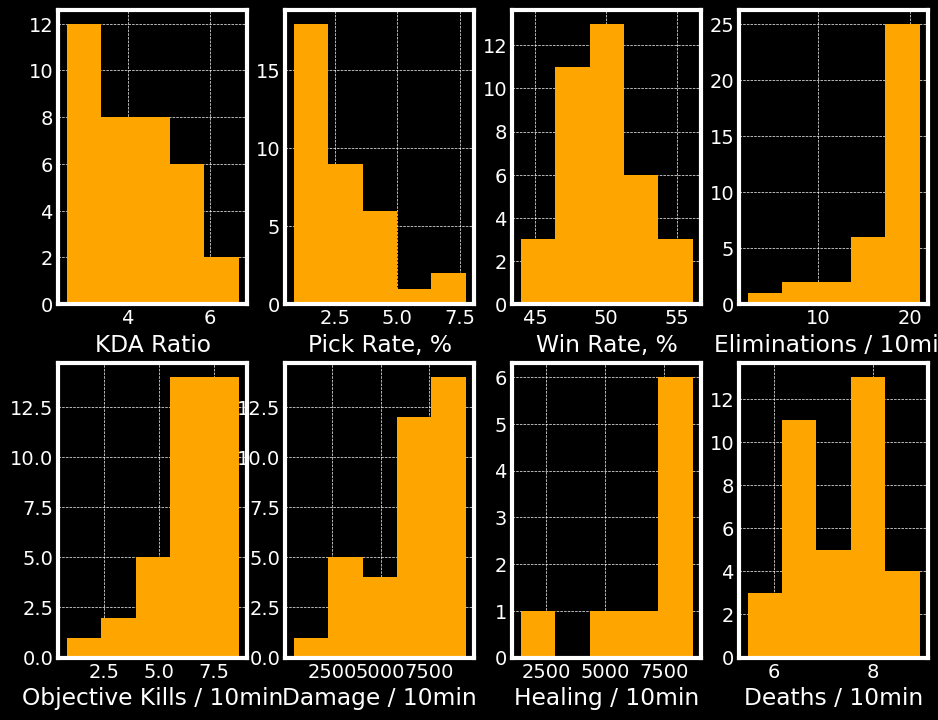

In [355]:
fig1, ax1 = plt.subplots(2, 4, figsize = (10, 8))
ax1[0, 0].hist(all_df['KDA Ratio'], bins=5, color = 'orange')
ax1[0, 1].hist(all_df['Pick Rate, %'], bins=5, color = 'orange')
ax1[0, 2].hist(all_df['Win Rate, %'], bins=5, color = 'orange')
ax1[0, 3].hist(all_df['Eliminations / 10min'], bins=5, color = 'orange')
ax1[1, 0].hist(all_df['Objective Kills / 10min'], bins=5, color = 'orange')
ax1[1, 1].hist(all_df['Damage / 10min'], bins=5, color = 'orange')
ax1[1, 2].hist(all_df['Healing / 10min'], bins=5, color = 'orange')
ax1[1, 3].hist(all_df['Deaths / 10min'], bins=5, color = 'orange')
ax1[0, 0].set_xlabel('KDA Ratio')
ax1[0, 1].set_xlabel('Pick Rate, %')
ax1[0, 2].set_xlabel('Win Rate, %')
ax1[0, 3].set_xlabel('Eliminations / 10min')
ax1[1, 0].set_xlabel('Objective Kills / 10min')
ax1[1, 1].set_xlabel('Damage / 10min')
ax1[1, 2].set_xlabel('Healing / 10min')
ax1[1, 3].set_xlabel('Deaths / 10min')

plt.style.use('dark_background')
plt.show()

### Tank Statistics
I am using the purple color to represent the tank role because it is often used in the coloration of various tank abilities such as the ones of Ramattra. I initially thought that KDA was the main contributing factor towards win percentage for a tank hero. KDA Ratio which means their Kill, Death, Assist Ratio. I chose to look at this hero statistic because tanks have a ton of health and are often used as a shield, so they do not do as much damage as the DPS would be expected to. Therefore, a good tank should have a good KDA Ratio and should not die as much as the other heroes would. However, from this data, it seems as though the eliminations ever 10 minutes is more aligned.

![Overwatch 2 Tanks](tank.png)

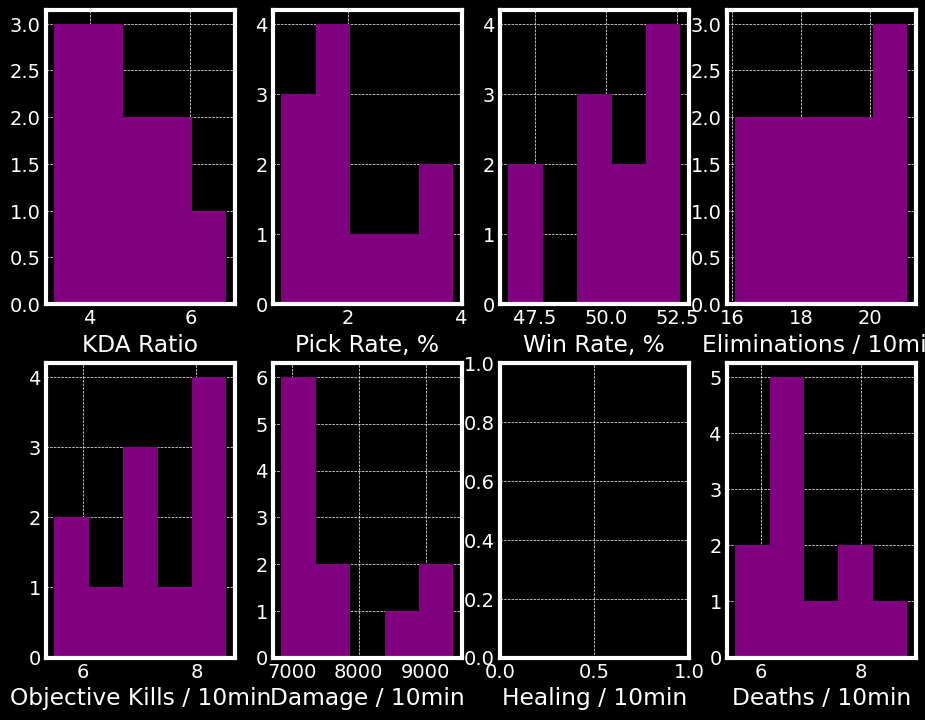

In [358]:
fig2, ax2 = plt.subplots(2, 4, figsize = (10, 8))
ax2[0, 0].hist(tank_df['KDA Ratio'], bins=5, color = 'purple')
ax2[0, 1].hist(tank_df['Pick Rate, %'], bins=5, color = 'purple')
ax2[0, 2].hist(tank_df['Win Rate, %'], bins=5, color = 'purple')
ax2[0, 3].hist(tank_df['Eliminations / 10min'], bins=5, color = 'purple')
ax2[1, 0].hist(tank_df['Objective Kills / 10min'], bins=5, color = 'purple')
ax2[1, 1].hist(tank_df['Damage / 10min'], bins=5, color = 'purple')
#ax2[1, 2].hist(tank_df['Healing / 10min'], bins=5)
ax2[1, 3].hist(tank_df['Deaths / 10min'], bins=5, color = 'purple')
ax2[0, 0].set_xlabel('KDA Ratio')
ax2[0, 1].set_xlabel('Pick Rate, %')
ax2[0, 2].set_xlabel('Win Rate, %')
ax2[0, 3].set_xlabel('Eliminations / 10min')
ax2[1, 0].set_xlabel('Objective Kills / 10min')
ax2[1, 1].set_xlabel('Damage / 10min')
ax2[1, 2].set_xlabel('Healing / 10min')
ax2[1, 3].set_xlabel('Deaths / 10min')

plt.show()

### DPS Statistics
I am using the red color since damages often do the most damage which puts their enemies in a red glow when they are getting damaged. Initially I thought that damage would have the greatest effect towards win percentage for a damage hero. Damage heroes are made to do the most damage, so I assumed that the most damage done by a damage hero would equal to the highest win percentage. However, from the data collected, it looks like the KDA Ratio along with the Pick Rate percentage have more of a contribution to the win percentage.  

![Overwatch 2 DPS](Overwatch-2-Damage-and-Tank-Players-Dealing-With-Long-Role-Queue-Times.avif)

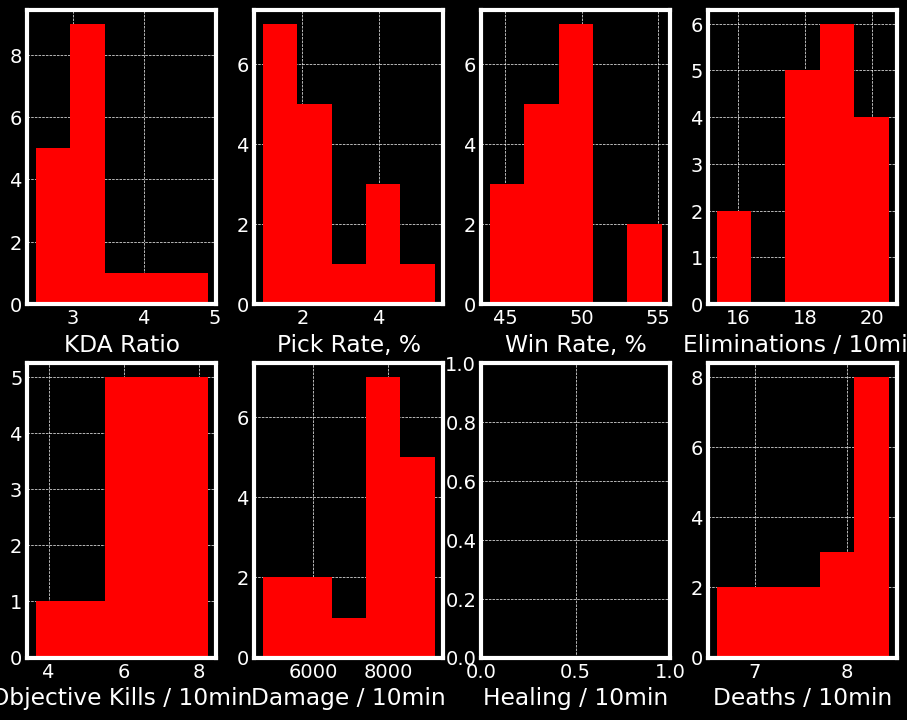

In [357]:
fig3, ax3 = plt.subplots(2, 4, figsize = (10, 8))
ax3[0, 0].hist(dps_df['KDA Ratio'], bins=5, color = 'red')
ax3[0, 1].hist(dps_df['Pick Rate, %'], bins=5, color = 'red')
ax3[0, 2].hist(dps_df['Win Rate, %'], bins=5, color = 'red')
ax3[0, 3].hist(dps_df['Eliminations / 10min'], bins=5, color = 'red')
ax3[1, 0].hist(dps_df['Objective Kills / 10min'], bins=5, color = 'red')
ax3[1, 1].hist(dps_df['Damage / 10min'], bins=5, color = 'red')
#ax3[1, 2].hist(dps_df['Healing / 10min'], bins=5)
ax3[1, 3].hist(dps_df['Deaths / 10min'], bins=5, color = 'red')
ax3[0, 0].set_xlabel('KDA Ratio')
ax3[0, 1].set_xlabel('Pick Rate, %')
ax3[0, 2].set_xlabel('Win Rate, %')
ax3[0, 3].set_xlabel('Eliminations / 10min')
ax3[1, 0].set_xlabel('Objective Kills / 10min')
ax3[1, 1].set_xlabel('Damage / 10min')
ax3[1, 2].set_xlabel('Healing / 10min')
ax3[1, 3].set_xlabel('Deaths / 10min')

plt.show()

### Support Statistics
I chose to represent the support heroes with the color yellow since yellow is the color of healing. Support heroes are the healers of the team, so I initially thought the healing done by that hero would equate to the win percentage for that hero. However, based off of the data, I believe that either KDA Ratio or Pick Rate percentage must have a higher contributing factor towards the win percentage. 

![Overwatch 2 Supports](Overwatch-Support-Heroes-Feature-Image.avif)

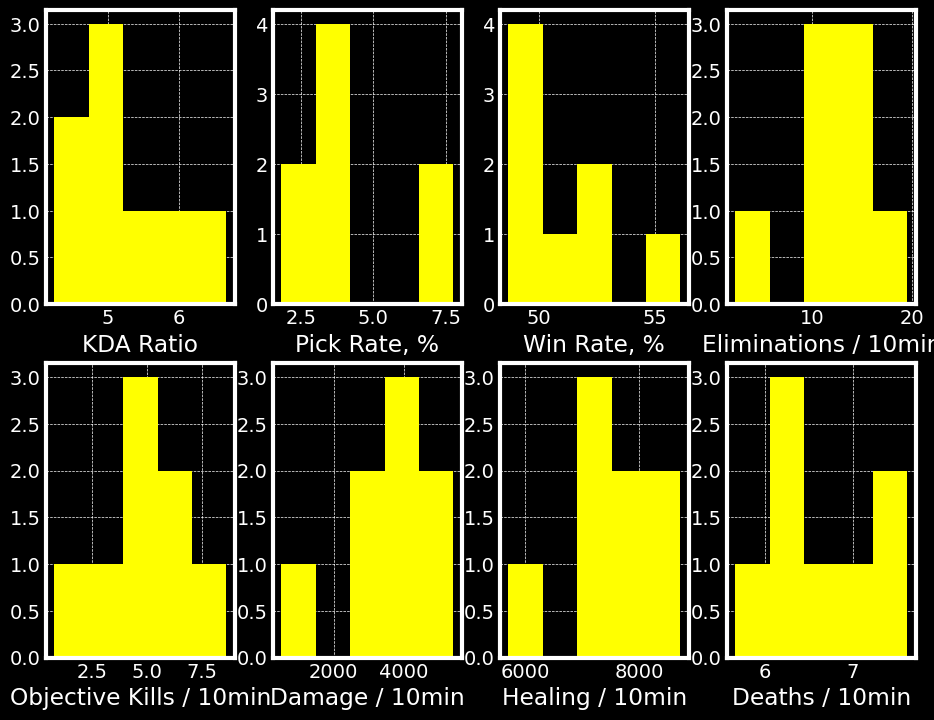

In [359]:
fig4, ax4 = plt.subplots(2, 4, figsize = (10, 8))
ax4[0, 0].hist(supp_df['KDA Ratio'], bins=5, color = 'yellow')
ax4[0, 1].hist(supp_df['Pick Rate, %'], bins=5, color = 'yellow')
ax4[0, 2].hist(supp_df['Win Rate, %'], bins=5, color = 'yellow')
ax4[0, 3].hist(supp_df['Eliminations / 10min'], bins=5, color = 'yellow')
ax4[1, 0].hist(supp_df['Objective Kills / 10min'], bins=5, color = 'yellow')
ax4[1, 1].hist(supp_df['Damage / 10min'], bins=5, color = 'yellow')
ax4[1, 2].hist(supp_df['Healing / 10min'], bins=5, color = 'yellow')
ax4[1, 3].hist(supp_df['Deaths / 10min'], bins=5, color = 'yellow')
ax4[0, 0].set_xlabel('KDA Ratio')
ax4[0, 1].set_xlabel('Pick Rate, %')
ax4[0, 2].set_xlabel('Win Rate, %')
ax4[0, 3].set_xlabel('Eliminations / 10min')
ax4[1, 0].set_xlabel('Objective Kills / 10min')
ax4[1, 1].set_xlabel('Damage / 10min')
ax4[1, 2].set_xlabel('Healing / 10min')
ax4[1, 3].set_xlabel('Deaths / 10min')

plt.show()

# Data Analysis
### Scatter Plots
I created scatter plots to really see which hero does the most of the skill I single out.

### Tank Eliminations 
In the data collected below, I chose to base the tank hero statistics off of the elminations done every 10 minutes for each hero. This was mainly because of what the statistics found in the Analysis Plan proved. (Color set from the original tank purple to lavender, so one could view the tiny dots better.)

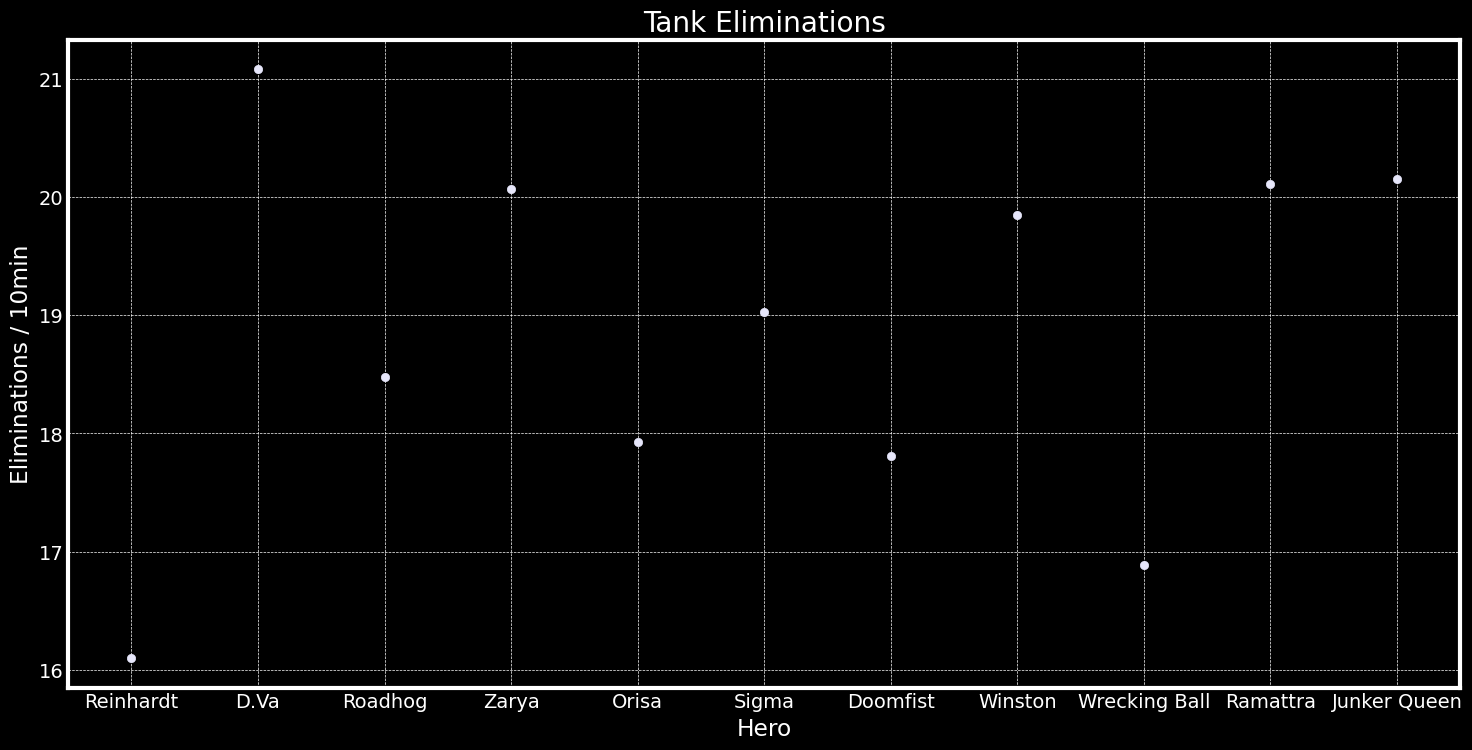

In [361]:
fig5, ax5 = plt.subplots(figsize = (16, 8))
ax5.scatter(tank_df['Hero'], tank_df['Eliminations / 10min'], color = 'lavender')
ax5.set_xlabel('Hero')
ax5.set_ylabel('Eliminations / 10min')
ax5.set_title('Tank Eliminations')
#ax5.legend(['Tank'])

plt.show()

### Tank Win Percentage
Based off of the eliminations vs win percentage for tank, I believe Ramattra and Junker Queen are the two best tank heroes to learn. Although D. Va has an immensely high elimination count, I believe her statistics to be more of an outlier based off of the data. 

![Overwatch 2 Top Tanks](top-tanks.jpg)

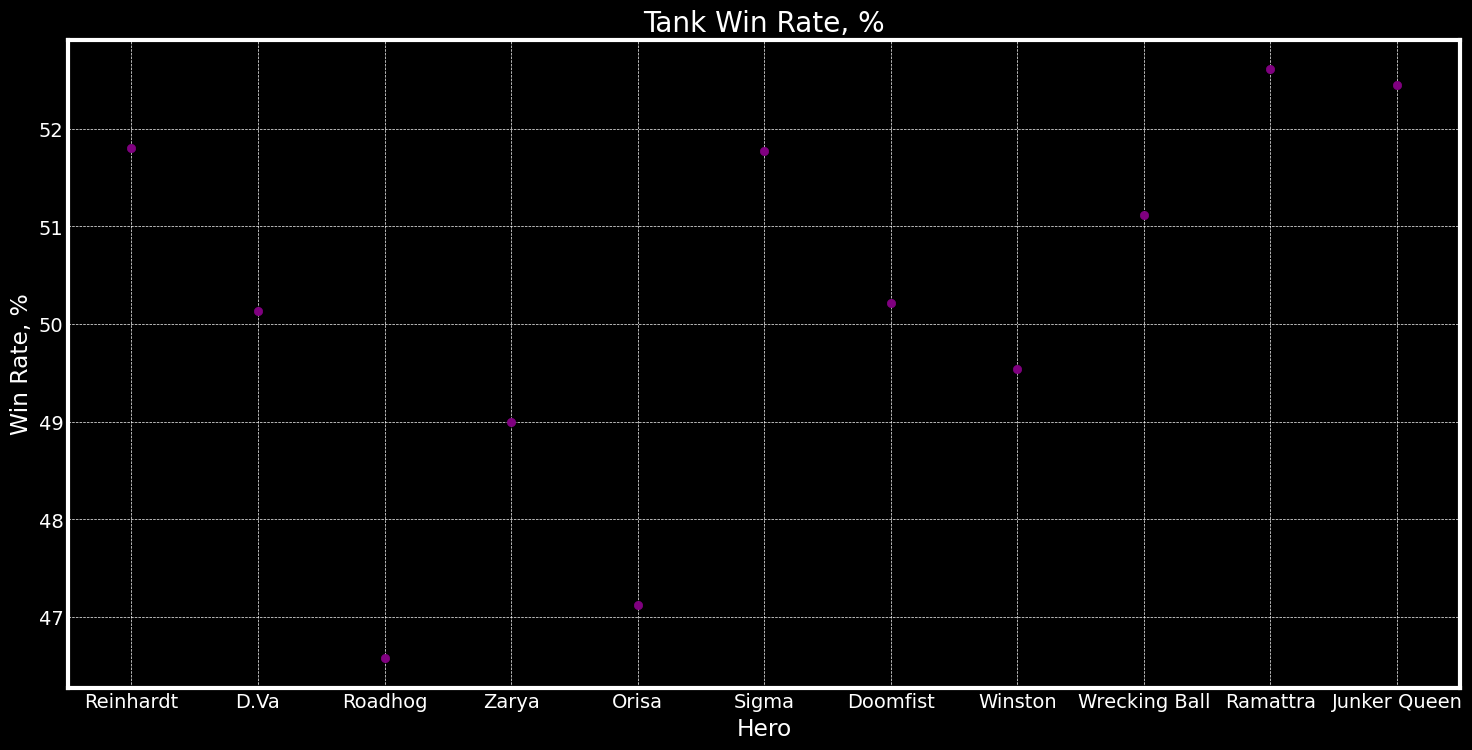

In [362]:
fig6, ax6 = plt.subplots(figsize = (16, 8))
ax6.scatter(tank_df['Hero'], tank_df['Win Rate, %'], color = 'purple')
ax6.set_xlabel('Hero')
ax6.set_ylabel('Win Rate, %')
ax6.set_title('Tank Win Rate, %')
#ax6.legend(['Tank'])

plt.show()

### DPS KDA Ratio & Pick Rate % 
For damage heroes, I chose to look at the KDA Ratio and Pick Rate percentage to see which aligned the best with the win percentage based off the data found from the Analysis Plan.

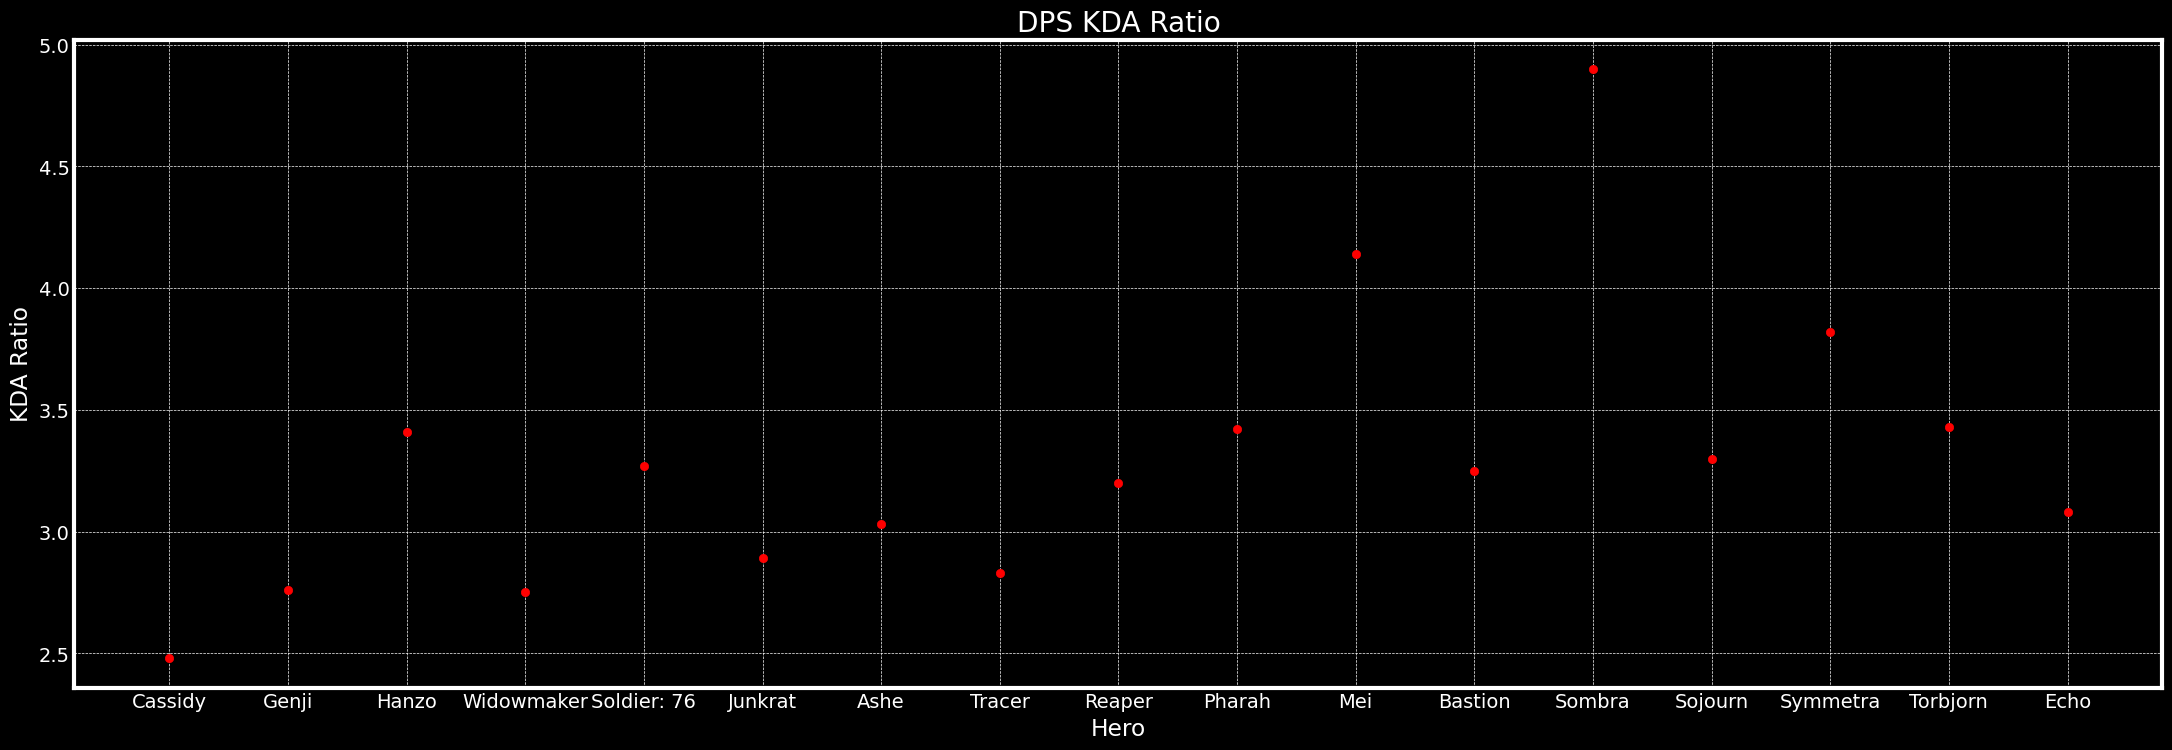

In [363]:
fig7, ax7 = plt.subplots(figsize = (24, 8))
ax7.scatter(dps_df['Hero'], dps_df['KDA Ratio'], color = 'red')
ax7.set_xlabel('Hero')
ax7.set_ylabel('KDA Ratio')
ax7.set_title('DPS KDA Ratio')
#ax7.legend(['DPS'])

plt.show()

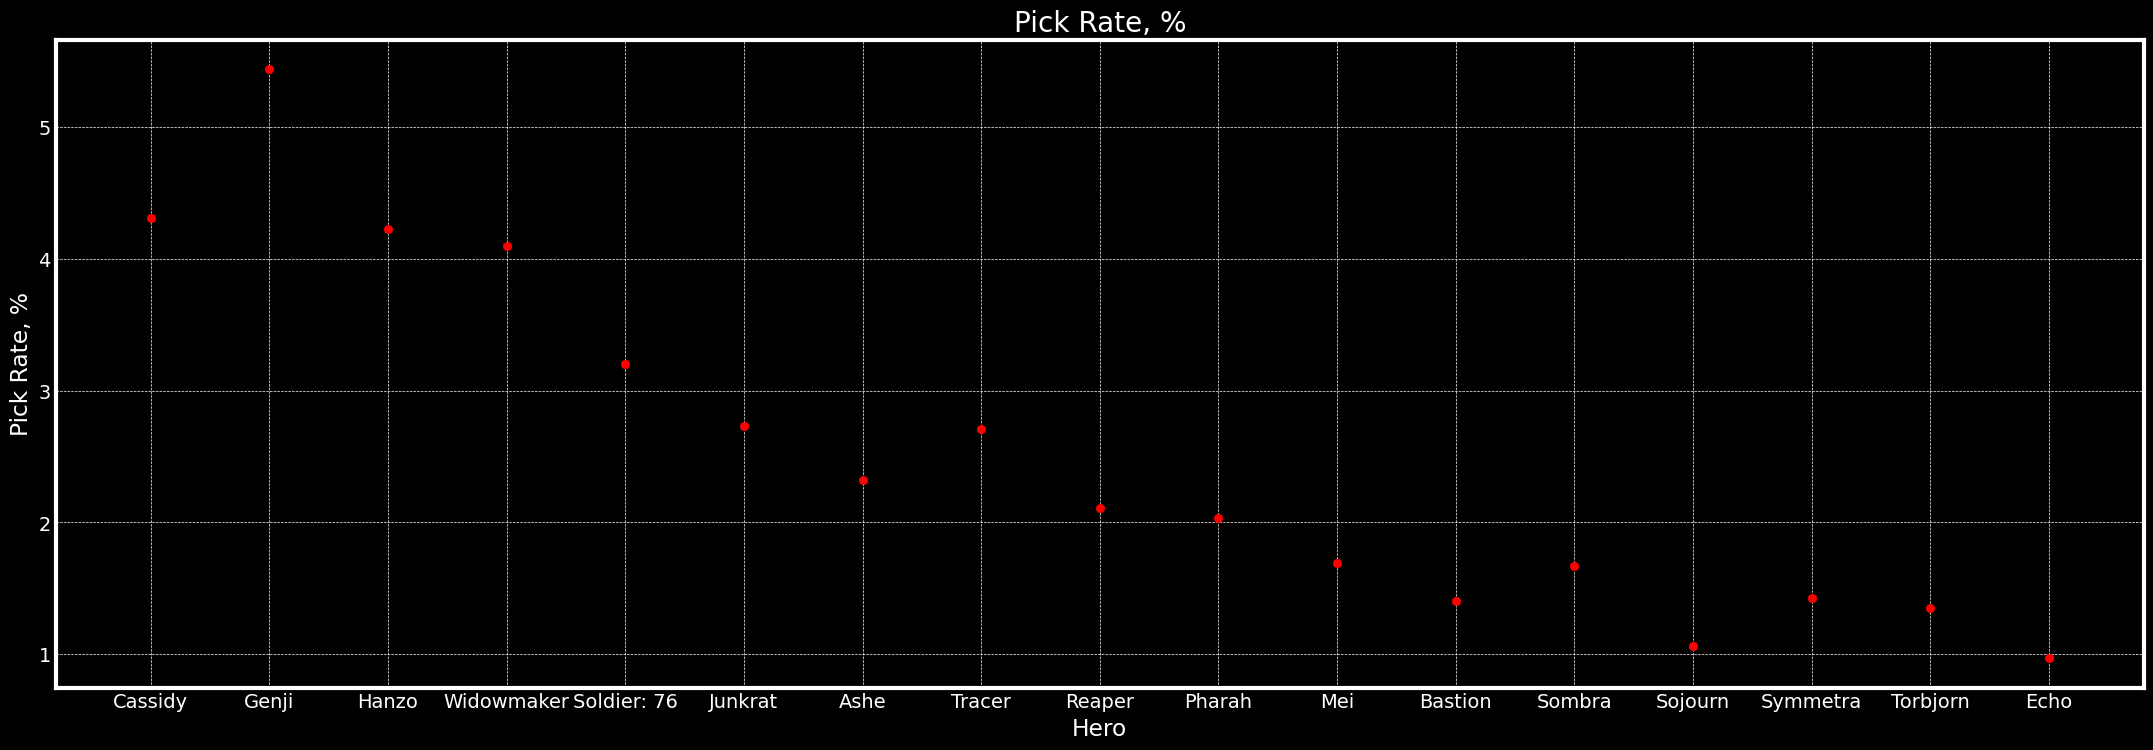

In [364]:
fig8, ax8 = plt.subplots(figsize = (24, 8))
ax8.scatter(dps_df['Hero'], dps_df['Pick Rate, %'], color = 'red')
ax8.set_xlabel('Hero')
ax8.set_ylabel('Pick Rate, %')
ax8.set_title('Pick Rate, %')
#ax8.legend(['DPS'])

plt.show()

### DPS Win Percentage
At first glance of the data from the Analysis Plan section, I though Pick Rate percentage had more of a tie with win percentage. However, I believe that the KDA Ratio for DPS heroes actually has the highest effect. There is a ton of complex data considering all of the immensely different data error points and outlying factors, but from this data, Symmetra and Mei are the two best DPS heroes to consider learning. 

![Overwatch 2 Top DPS](overwatch-reworks-symmetra-mei-more.avif)

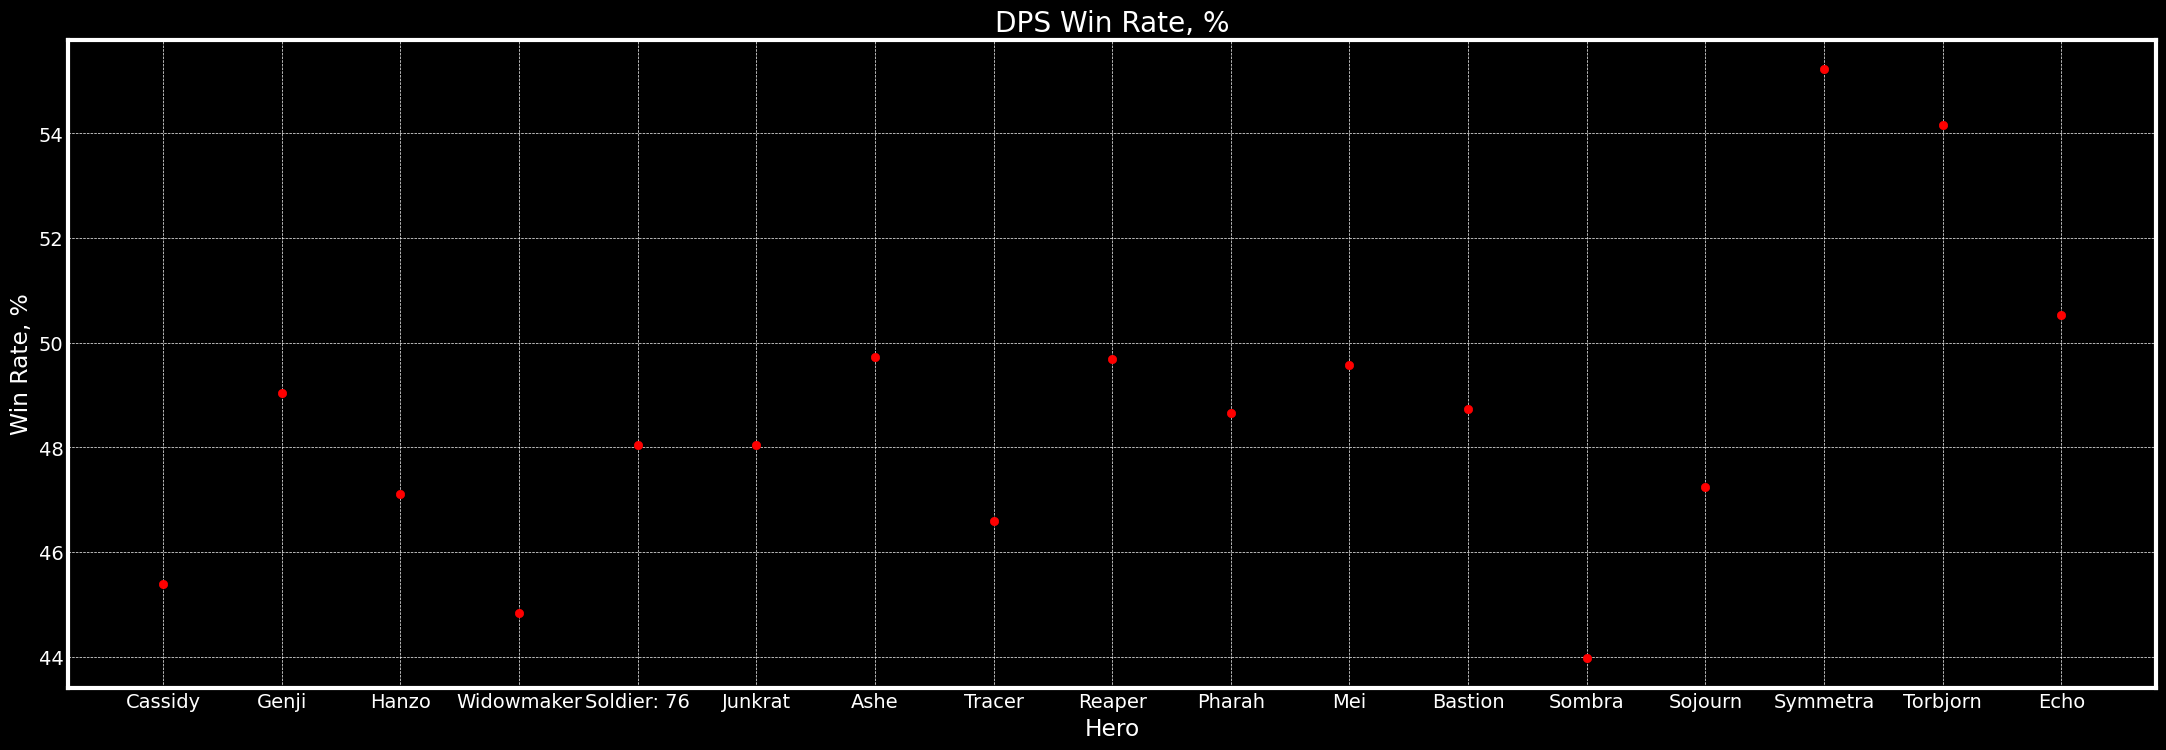

In [365]:
fig9, ax9 = plt.subplots(figsize = (24, 8))
ax9.scatter(dps_df['Hero'], dps_df['Win Rate, %'], color = 'red')
ax9.set_xlabel('Hero')
ax9.set_ylabel('Win Rate, %')
ax9.set_title('DPS Win Rate, %')
#ax9.legend(['DPS'])

plt.show()

### Support KDA Ratio & Pick Rate % 
For support heroes, I also chose to look at the KDA Ratio and Pick Rate percentage to see which aligned the best with the win percentage since those two were the closest based off of the analysis plan.

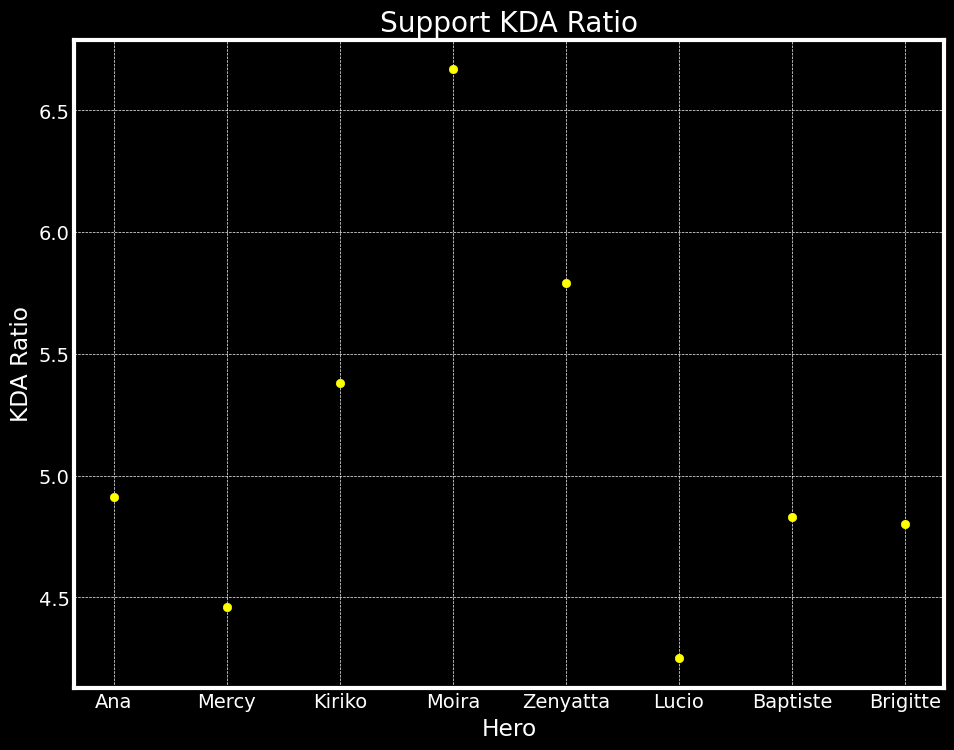

In [366]:
fig10, ax10 = plt.subplots(figsize = (10, 8))
ax10.scatter(supp_df['Hero'], supp_df['KDA Ratio'], color = 'yellow')
ax10.set_xlabel('Hero')
ax10.set_ylabel('KDA Ratio')
ax10.set_title('Support KDA Ratio')
#ax10.legend(['Support'])

plt.show()

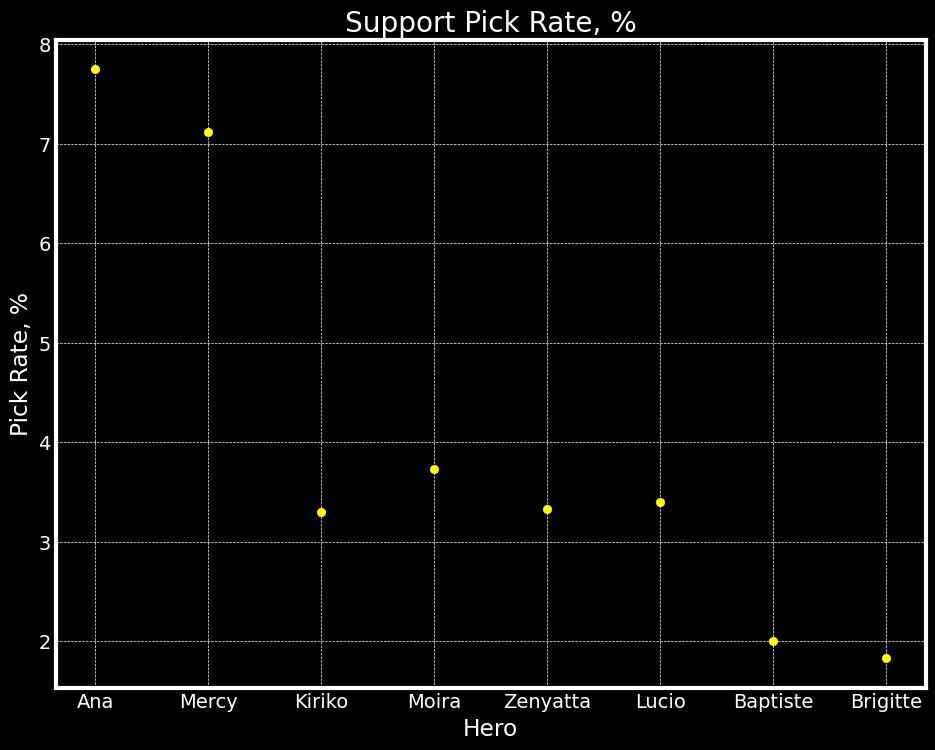

In [367]:
fig11, ax11 = plt.subplots(figsize = (10, 8))
ax11.scatter(supp_df['Hero'], supp_df['Pick Rate, %'], color = 'yellow')
ax11.set_xlabel('Hero')
ax11.set_ylabel('Pick Rate, %')
ax11.set_title('Support Pick Rate, %')
#ax11.legend(['Support'])

plt.show()

### Support Win Percentage
I am honestly very perplexed by the outcome of this data. I don't see how the hero Brigitte has that high of a win rate above all of the other heroes. It could be that the people who learn to play her just have brute talent, but from the data, I do not see what contributes to her having the highest win percentage.

![Overwatch 2 Top Support](top-support.jpg)

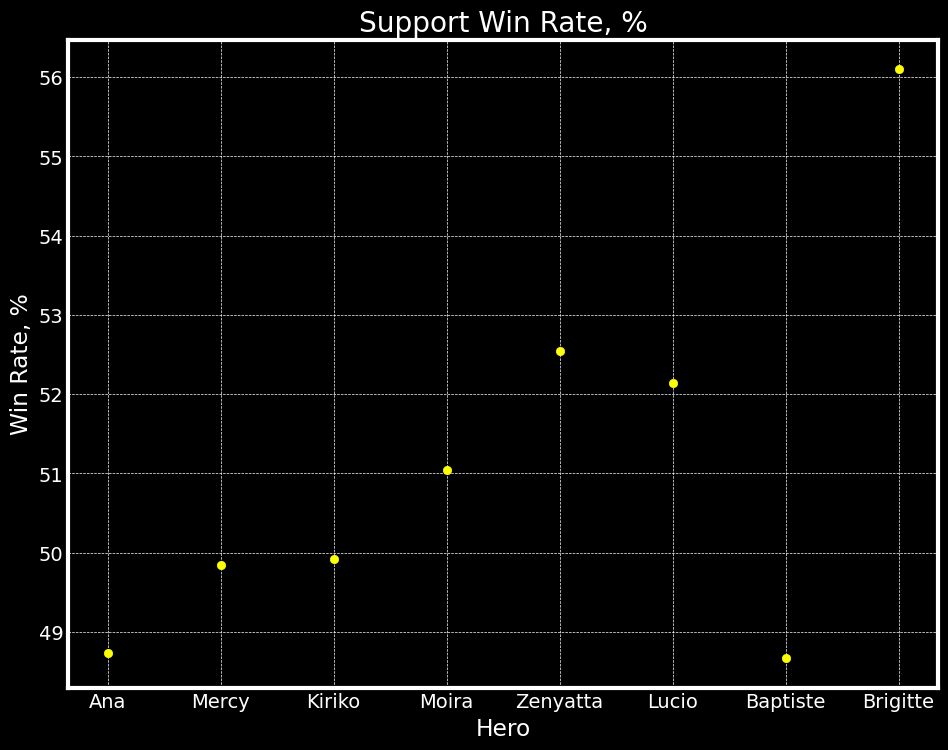

In [368]:
fig12, ax12 = plt.subplots(figsize = (10, 8))
ax12.scatter(supp_df['Hero'], supp_df['Win Rate, %'], color = 'yellow')
ax12.set_xlabel('Hero')
ax12.set_ylabel('Win Rate, %')
ax12.set_title('Support Win Rate, %')
#ax12.legend(['Support'])

plt.show()

# Conclusion
Overall, it does not seeem as though any of my hyptheses were correct for any Overwatch 2 Role. For the tank role, Ramattra and Junker Queen are the two top heroes to invest time in learning based off of the win percentage as well as eliminations done every 10 minutes. For the damage role, Symmetra and Mei are the top two heroes to learn based off of the win percentage and their KDA Ratios. However, for support, it shows Brigitte with the highest win percentage by a lot, but the data I thought would support this does not seem to for that hero, so I am unsure of how to interpret this. Some potential limitations within this data analysis would be how different each hero is to play and how many different abilities each hero has. There is also always human error, so if someone with bad stats in the game played a lot of a certain hero, that hero's win percentage may be immensely lower. If I were to take a different approach to this data analysis, I would look more deeply into which character was best for each role and each skill tier since I know there are differences there as well. Instead, I just looked at a combination of all the skill tiers, so there are definitely limitations there as well. For future work, I will remember to organize my work with fitting headers and provide charts and visuals that correspond well with the topic I am describing. I will also be sure to include thorough descriptions throughout my reports, so others may read it and easily understand my thought process. 

![Overwatch 2 Conclusion](1x.webp)